  # PostProcessing
  This notebook is initially designed for PostProcessing ASETS-II numerical and experimental data.
  It can also be used for other configurations's numerical results. But if you want to compare with other experimental data with a different format than ASETS-II. You should find a way to read them to RTD and RTDt in this notebook.

In [1]:
using OscillatingHeatPipe
using Plots
# using Interact

  # Read simulation data

In [2]:
using JLD2

In [3]:
function get_qbplus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbplus = zeros_surface(base_cache)
    return qbplus
end

function get_qbminus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbminus = zeros_surface(base_cache)
    # qbminus .= nrm.u
    return qbminus
end

bcdict = Dict("exterior" => get_qbplus,"interior" => get_qbminus)

Dict{String, Function} with 2 entries:
  "interior" => get_qbminus
  "exterior" => get_qbplus

In [4]:
function heatermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    σ .= phys_params["areaheater_power"] / phys_params["areaheater_area"] / phys_params["flux_correction"] 
end


function condensermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    T0 = phys_params["areaheater_temp"]
    h = phys_params["areaheater_coeff"]
    corr = phys_params["flux_correction"] 

    σ .= h*(T0 - T) / corr
end

condensermodel! (generic function with 1 method)

In [5]:

function ohpmodel!(σ,T,t,fr::LineRegionCache,phys_params)
    σ .= phys_params["ohp_flux"] ./ phys_params["flux_correction"] 
end

ohpmodel! (generic function with 1 method)

In [6]:
# read_path = "../numedata/ILMsolution.jld2"
read_path = "/Users/yuxuanli/Documents/Hoffman/zach041/numedata/Zach_300s_90D.jld2";
SimuResult = load(read_path)["SimulationResult"];

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

  ### get time array

In [7]:
t = SimuResult.tube_hist_t;

  # Plot 2D interpolated curves

  ### Interpolate 2D T data from the plate for fixed sensors on the plate

  place the 2D sensors

In [8]:
x2Dsensors = [0.0,   0.0, 0.0, 0.0, 0.0,-3INCHES+12e-3,-3INCHES+35e-3,-3INCHES+65e-3,3INCHES-65e-3,3INCHES-35e-3,3INCHES-12e-3]
y2Dsensors = [-2e-2, -1e-2, 0.0, 1e-2, 2e-2,0.0,           0.0,            0.0,          0.0,          0.0,          0.0]
plate_sensors = (x2Dsensors,y2Dsensors);

  get the curve

In [9]:
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

  ### 2D interpolated temperature curve at fixed sensors

In [10]:
RTD_for_plotting = 1:11;

plot OHP

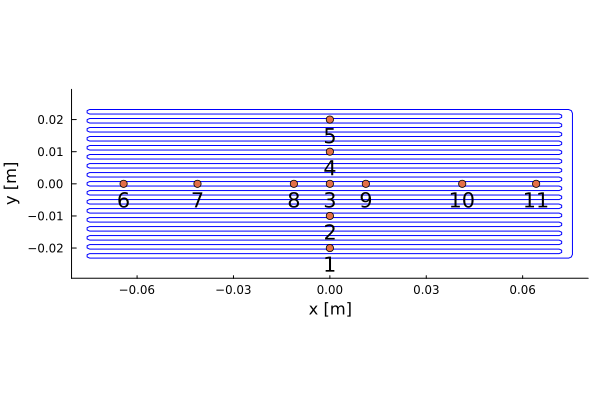

In [11]:
plot(OHP(),SimuResult)
scatter!(x2Dsensors[RTD_for_plotting],y2Dsensors[RTD_for_plotting])
annotate!(x2Dsensors[RTD_for_plotting], y2Dsensors[RTD_for_plotting].-0.005, RTD_for_plotting)

plot temperature curve

In [12]:
T_offset = 18.

18.0

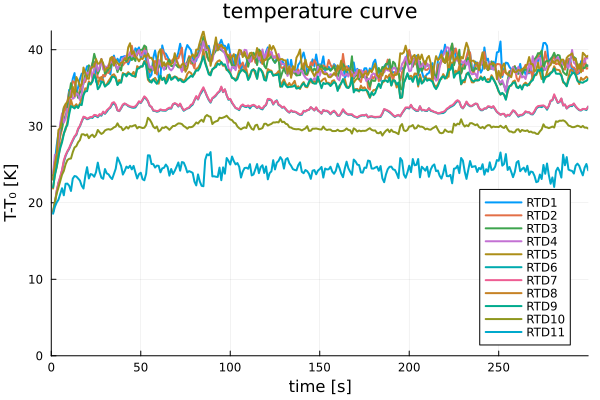

In [13]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult)
# plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

  ### 2D interpolated thermal conductance

In [14]:
ihot = 3 # hot sensor  for calculating thermal conductance
icold = 11 # cold sensor  for calculating thermal conductance;

11

plot them separately

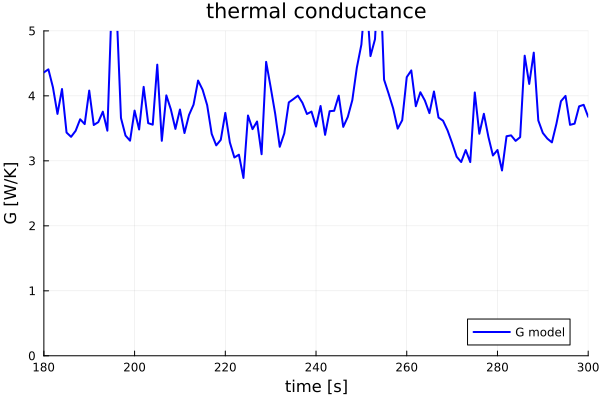

In [15]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))

  # Plot 2D graphs

  ### film and slug dynamics

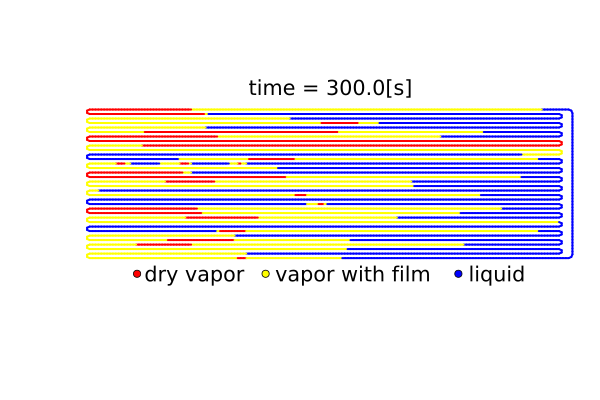

In [16]:
plot(OHPSlug(),300,SimuResult, aspectratio=1)

In [39]:
plot(OHPTemp(),1,SimuResult, aspectratio=1)
savefig("Tfield_H02.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/Tfield_H02.pdf"

In [18]:
using Statistics

In [19]:
power = SimuResult.integrator_tube.p.wall.power
istart = 200
iend = 300
cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
mean(cond[istart:iend])

3.7472989667885335

## get a map of conductance

In [20]:
# angle_list = ["00" "30" "60" "90"]
# power_list = ["80"]

angle_list = ["00" "30" "60" "90"]
power_list = ["50" "60" "70" "80"]

file_dict = Dict("50"=>["zach033","zach040","zach041","zach042","zach043","zach044","zach045","zach046"], 
                 "60"=>["zach034","zach048","zach049","zach050","zach051","zach052","zach053","zach054"], 
                 "70"=>["zach035","zach056","zach057","zach058","zach059","zach060","zach061","zach062"], 
                 "80"=>["zach036","zach064","zach065","zach066","zach067","zach068","zach069","zach070"])


Dict{String, Vector{String}} with 4 entries:
  "80" => ["zach036", "zach064", "zach065", "zach066", "zach067", "zach068", "z…
  "70" => ["zach035", "zach056", "zach057", "zach058", "zach059", "zach060", "z…
  "50" => ["zach033", "zach040", "zach041", "zach042", "zach043", "zach044", "z…
  "60" => ["zach034", "zach048", "zach049", "zach050", "zach051", "zach052", "z…

In [21]:
isfile("/Users/yuxuanli/Documents/Hoffman/zach033/numedata/Zach_300s_90D.jld2")

true

## error bar result

In [22]:
aa = []

Any[]

In [23]:
isempty(aa)

true

In [24]:
condmap = zeros(length(power_list),length(angle_list))
condavg = zeros(length(power_list),length(angle_list))
condmax = zeros(length(power_list),length(angle_list))
condmin = zeros(length(power_list),length(angle_list))
for ipower in eachindex(power_list)
    for iangle in eachindex(angle_list)

        cond_individual = []
        for ifile in eachindex(file_dict[power_list[ipower]])

        read_path = "/Users/yuxuanli/Documents/Hoffman/"*file_dict[power_list[ipower]][ifile]*"/numedata/Zach_300s_"*angle_list[iangle]*"D.jld2"

        if isfile(read_path)
            
            SimuResult = load(read_path)["SimulationResult"];
    
            t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
            power = SimuResult.integrator_tube.p.wall.power
            istart = 200
            iend = 300
            cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
            push!(cond_individual,mean(cond[istart:iend]))
        end
        end
        if !isempty(cond_individual)
            println(cond_individual)
            condavg[ipower,iangle] = mean(cond_individual)
            condmax[ipower,iangle] = maximum(cond_individual)
            condmin[ipower,iangle] = minimum(cond_individual)
        end
        
    end  
end

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

In [25]:
condmax

4×4 Matrix{Float64}:
 2.12597  3.31851  4.0      3.8883
 2.13997  3.42326  3.87297  3.60148
 0.0      2.94436  3.44492  3.67245
 2.04128  2.21613  3.17115  3.3511

In [26]:
condmin

4×4 Matrix{Float64}:
 1.33593   2.43971  3.37975  3.54436
 0.643571  2.65791  3.07355  3.02568
 0.0       1.94337  2.77142  3.09229
 1.35883   1.75965  2.84189  2.73251

## one result

In [27]:
angle_list = ["00" "30" "60" "90"]
power_list = ["zach033" "zach034" "zach035" "zach036"]

1×4 Matrix{String}:
 "zach033"  "zach034"  "zach035"  "zach036"

In [28]:
condmap = zeros(length(power_list),length(angle_list))
for ipower in eachindex(power_list)
    for iangle in eachindex(angle_list)

        read_path = "/Users/yuxuanli/Documents/Hoffman/"*power_list[ipower]*"/numedata/Zach_300s_"*angle_list[iangle]*"D.jld2"

        if isfile(read_path)
            
            SimuResult = load(read_path)["SimulationResult"];
    
            t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
            power = SimuResult.integrator_tube.p.wall.power
            istart = 200
            iend = 300
            cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
            condmap[ipower,iangle] = (mean(cond[istart:iend]))
        end
    end

    
end

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

In [29]:
x = 50:10:80
y = 0:30:90

0:30:90

In [30]:
condmap

4×4 Matrix{Float64}:
 1.93584   3.04799  3.777    3.86686
 0.643571  3.07157  3.57918  3.34188
 0.0       2.55403  3.3136   3.36528
 1.35883   1.8491   3.16718  3.3511

In [31]:
condmap_ref=[2.907 3.411 3.807 4.005;
0 3.259 3.760 3.935;
0 2.953 3.609 3.843;
0 0 3.349 3.647]

4×4 Matrix{Float64}:
 2.907  3.411  3.807  4.005
 0.0    3.259  3.76   3.935
 0.0    2.953  3.609  3.843
 0.0    0.0    3.349  3.647

In [32]:
read_path="/Users/yuxuanli/Documents/Hoffman/zach036/numedata/Zach_300s_00D.jld2"
            
            SimuResult = load(read_path)["SimulationResult"];
    
            t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
            power = SimuResult.integrator_tube.p.wall.power
            # istart = 200
            # iend = 300
            # cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
            # condmap[ipower,iangle] = (mean(cond[istart:iend]))
# plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

80.0

In [181]:
power

80.0

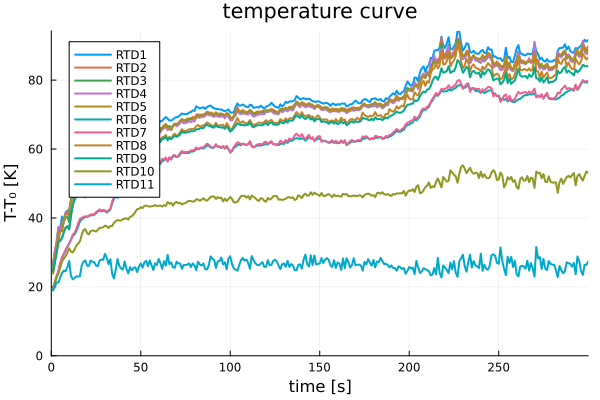

In [182]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult)
# plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

In [98]:
condmap

4×4 Matrix{Float64}:
 1.93584   3.04799  3.777    3.86686
 0.643571  3.07157  3.57918  3.34188
 0.0       2.55403  3.3136   3.36528
 1.35883   1.8491   3.16718  3.3511

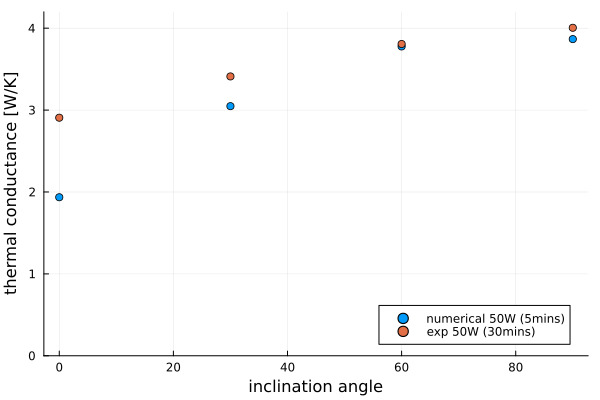

In [236]:
scatter(y,condmap[1,:],label="numerical 50W (5mins)",ylim=(0,4.2))
scatter!(y,condmap_ref[1,:],label="exp 50W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

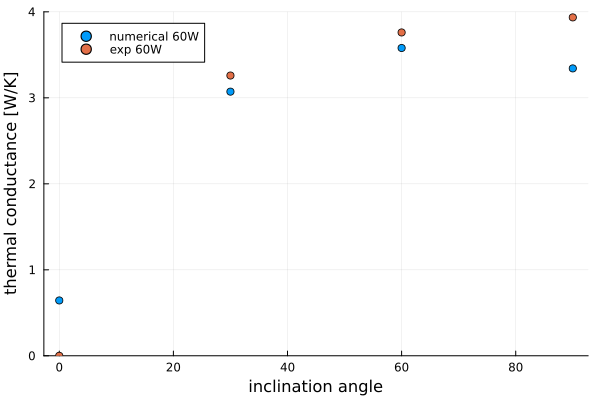

In [233]:
scatter(y,condmap[2,:],label="numerical 60W",ylim=(0,4))
scatter!(y,condmap_ref[2,:],label="exp 60W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

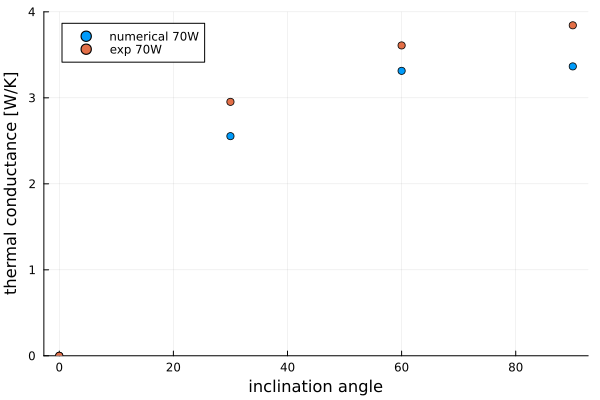

In [234]:
scatter(y,condmap[3,:],label="numerical 70W",ylim=(0,4))
scatter!(y,condmap_ref[3,:],label="exp 70W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

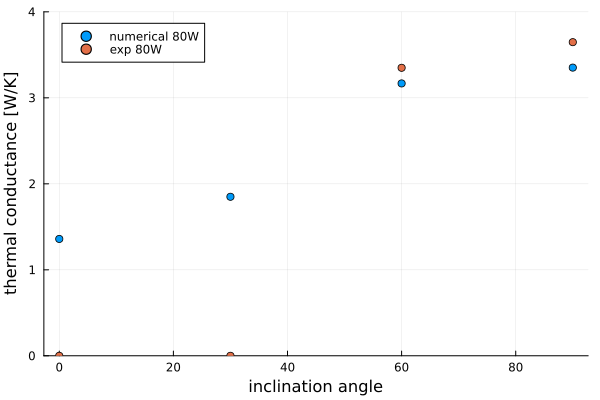

In [235]:
scatter(y,condmap[4,:],label="numerical 80W",ylim=(0,4))
scatter!(y,condmap_ref[4,:],label="exp 80W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

In [222]:
condmap_ref[:,4]

4-element Vector{Float64}:
 4.005
 3.935
 3.843
 3.647

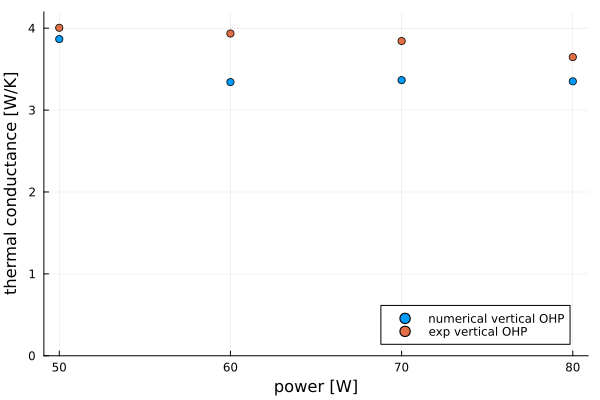

In [238]:
scatter(x,condmap[:,4],label="numerical vertical OHP",ylim=(0,4.2))
scatter!(x,condmap_ref[:,4],label="exp vertical OHP",xlabel="power [W]",ylabel="thermal conductance [W/K]")

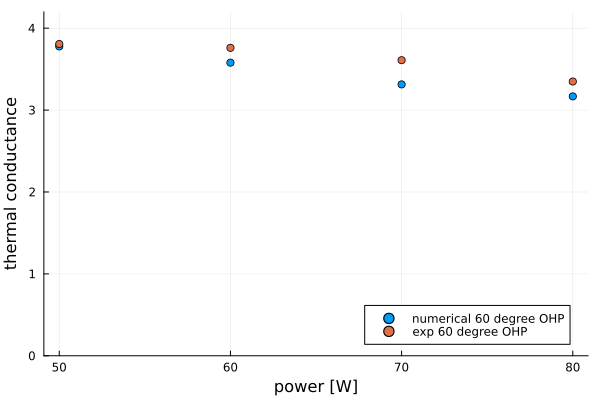

In [237]:
scatter(x,condmap[:,3],label="numerical 60 degree OHP",ylim=(0,4.2))
scatter!(x,condmap_ref[:,3],label="exp 60 degree OHP",xlabel="power [W]",ylabel="thermal conductance")

# new results with error bar

In [34]:
condavg

4×4 Matrix{Float64}:
 1.86703  2.98773  3.65175  3.74984
 1.4479   2.97396  3.54093  3.40105
 0.0      2.43102  3.19775  3.36638
 1.73451  1.94447  2.99958  3.11714

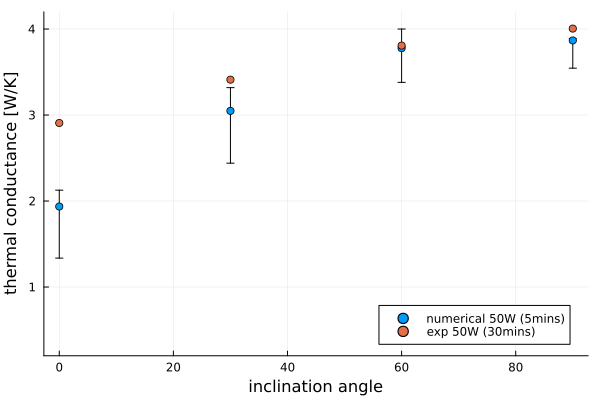

In [35]:

cond_err_min = condmap .- condmin
cond_err_max = condmax .- condmap

scatter(y,condmap[1,:],label="numerical 50W (5mins)",yerror=(cond_err_min[1,:],cond_err_max[1,:]),ylim=(0.2,4.2))
scatter!(y,condmap_ref[1,:],label="exp 50W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

In [38]:

cond_err_min = condavg .- condmin
cond_err_max = condmax .- condavg

scatter(y,condavg[1,:],label="numerical 50W (5mins)",yerror=(cond_err_min[1,:],cond_err_max[1,:]),ylim=(0.2,4.2))
scatter!(y,condmap_ref[1,:],label="exp 50W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

savefig("50W avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/50W avg.pdf"

In [107]:
condmap_ref

4×4 Matrix{Float64}:
 2.907  3.411  3.807  4.005
 0.0    3.259  3.76   3.935
 0.0    2.953  3.609  3.843
 0.0    0.0    3.349  3.647

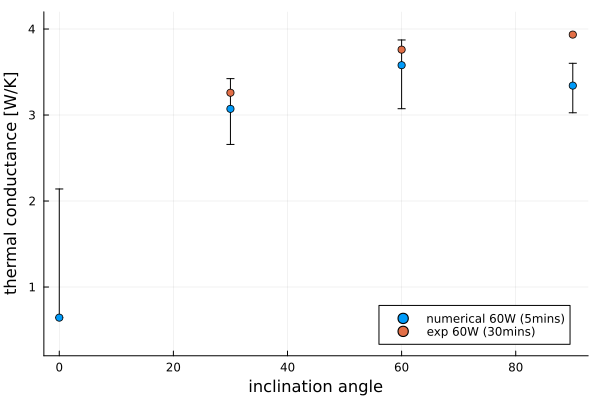

In [109]:

cond_err_min = condmap .- condmin
cond_err_max = condmax .- condmap

scatter(y,condmap[2,:],label="numerical 60W (5mins)",yerror=(cond_err_min[2,:],cond_err_max[2,:]),ylim=(0.2,4.2))
scatter!(y,condmap_ref[2,:],label="exp 60W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

In [41]:

cond_err_min = condavg .- condmin
cond_err_max = condmax .- condavg

scatter(y,condavg[2,:],label="numerical 60W (5mins)",yerror=(cond_err_min[2,:],cond_err_max[2,:]),ylim=(0.2,4.2))
scatter!(y,condmap_ref[2,:],label="exp 60W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

savefig("60W avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/60W avg.pdf"

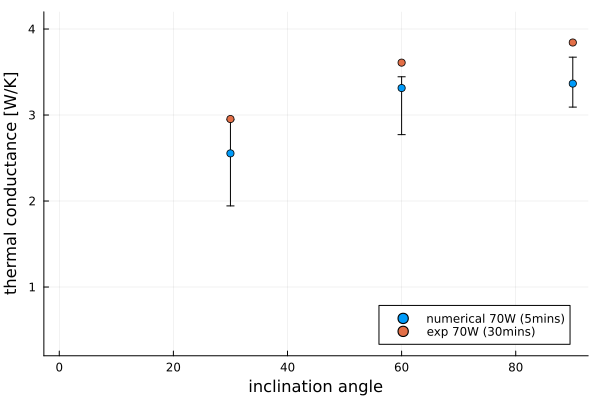

In [111]:

cond_err_min = condmap .- condmin
cond_err_max = condmax .- condmap

scatter(y,condmap[3,:],label="numerical 70W (5mins)",yerror=(cond_err_min[3,:],cond_err_max[3,:]),ylim=(0.2,4.2))
scatter!(y,condmap_ref[3,:],label="exp 70W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

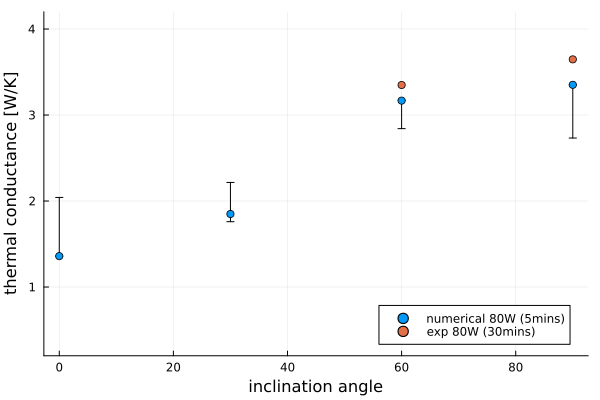

In [113]:

cond_err_min = condmap .- condmin
cond_err_max = condmax .- condmap

scatter(y,condmap[4,:],label="numerical 80W (5mins)",yerror=(cond_err_min[4,:],cond_err_max[4,:]),ylim=(0.2,4.2))
scatter!(y,condmap_ref[4,:],label="exp 80W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

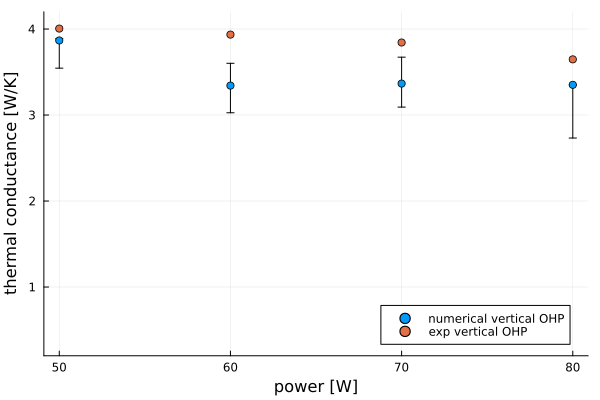

In [114]:
scatter(x,condmap[:,4],label="numerical vertical OHP",yerror=(cond_err_min[:,4],cond_err_max[:,4]),ylim=(0.2,4.2))
scatter!(x,condmap_ref[:,4],label="exp vertical OHP",xlabel="power [W]",ylabel="thermal conductance [W/K]")

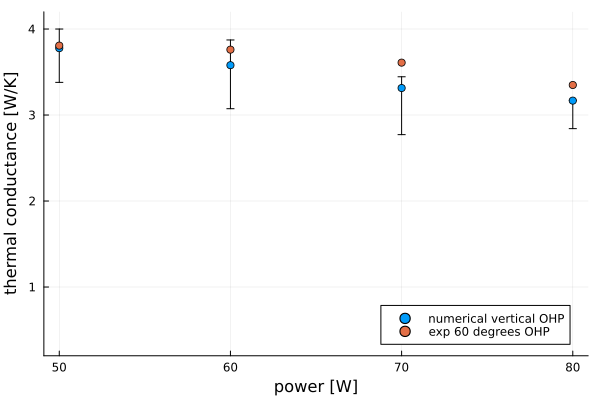

In [115]:
scatter(x,condmap[:,3],label="numerical vertical OHP",yerror=(cond_err_min[:,3],cond_err_max[:,3]),ylim=(0.2,4.2))
scatter!(x,condmap_ref[:,3],label="exp 60 degrees OHP",xlabel="power [W]",ylabel="thermal conductance [W/K]")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*